### 1.Import Nessescary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.Importing the dataset weight-height.csv

In [2]:
wt_ht_data = pd.read_csv("weight-height.csv")

In [3]:
wt_ht_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### 3.Data understanding

In [4]:
wt_ht_data.isnull()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [5]:
wt_ht_data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
wt_ht_data.shape

(10000, 3)

In [7]:
wt_ht_data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

### 4.Data Preparation

### Let's do Feature Engineering
It is nothing but a concept of whatever you do with Features, we call it as Feature Engineering
-  Feature Deletion
-  Feature Addition 
-  Feature Selection
-  Feature Decomposition
-  Feature Transformation

In [8]:
wt_ht_data_copy = wt_ht_data.copy()

In [9]:
del wt_ht_data_copy['Gender']

In [10]:
wt_ht_data_copy

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [11]:
#inches to cm calculation, 1 inch =  2.54
wt_ht_data_copy['Height_cm'] = wt_ht_data_copy['Height']*2.54

In [12]:
#pounds to kg calculation, 1 pound = 2.205kg
wt_ht_data_copy['Weight_kg'] = wt_ht_data_copy['Weight']/2.205

In [13]:
wt_ht_data_copy

,Height,Weight,Height_cm,Weight_kg
0,73.847017,241.893563,187.571423,109.702296
1,68.781904,162.310473,174.706036,73.610192
2,74.110105,212.740856,188.239668,96.481114
3,71.730978,220.042470,182.196685,99.792504
4,69.881796,206.349801,177.499761,93.582676
...,...,...,...,...
9995,66.172652,136.777454,168.078536,62.030591
9996,67.067155,170.867906,170.350573,77.491114
9997,63.867992,128.475319,162.224700,58.265451
9998,69.034243,163.852461,175.346978,74.309506


In [14]:
wt_ht_data_copy.drop(labels = ['Weight','Height'],axis=1,inplace=True)

In [15]:
wt_ht_data_copy

,Height_cm,Weight_kg
0,187.571423,109.702296
1,174.706036,73.610192
2,188.239668,96.481114
3,182.196685,99.792504
4,177.499761,93.582676
...,...,...
9995,168.078536,62.030591
9996,170.350573,77.491114
9997,162.224700,58.265451
9998,175.346978,74.309506


### Let's Test the Assumptions

#### Assumption 1 : - Normally distributed

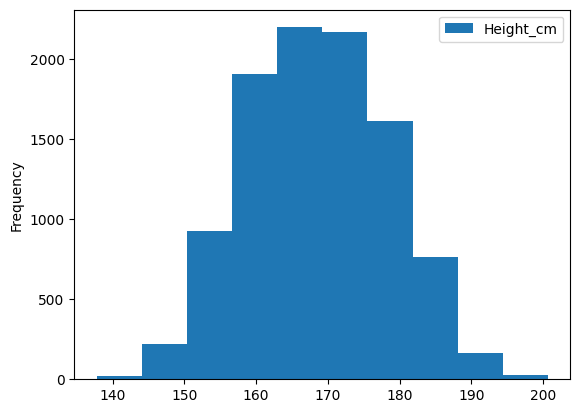

In [16]:
wt_ht_data_copy.plot(kind = 'hist',x = 'Weight_kg' )
plt.show()

#### Assumption 2 :- Linearity test

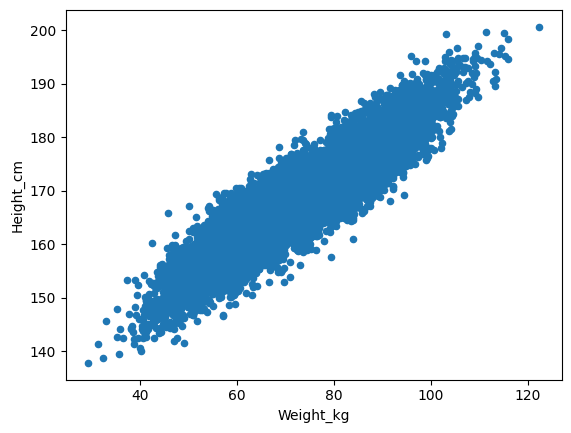

In [17]:
wt_ht_data_copy.plot(kind= 'scatter', x='Weight_kg', y='Height_cm')
plt.show()

### Assumption 3 :  No Multicollinerlirty

### Assumption 4 : No Autoregression

-  Assumption 5 : Homoscadacity test
-  Assumption 6 : Zero Residue mean test
-  **Note : These two test are testing after post modeling.**

### 5. Model Building

In [18]:
x=wt_ht_data_copy[['Weight_kg']]
y=wt_ht_data_copy[['Height_cm']]

In [19]:
x

,Weight_kg
0,109.702296
1,73.610192
2,96.481114
3,99.792504
4,93.582676
...,...
9995,62.030591
9996,77.491114
9997,58.265451
9998,74.309506


In [20]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


### 6. Model Training

In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear_model=LinearRegression()

In [24]:
linear_model.fit(x,y)

LinearRegression()

In [25]:
linear_model.coef_

array([[0.62062922]])

In [26]:
linear_model.intercept_

array([123.13387264])

### 7.Model Testing

In [27]:
#If Weight is 75kg, what will be the Height?
(0.62062922*75)+(123.13387264)

169.68106414

In [28]:
#If Weight is 75kg, what will be the Height?
(0.62062922*85)+(123.13387264)

175.88735634

In [32]:
#x_input = pd.DataFrame(data=[75,85])
y_prediction = linear_model.predict(x)

In [34]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


In [33]:
y_prediction

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]])

### 8.Model Evaluation

In [36]:
Error = y- y_prediction

In [37]:
Error

,Height_cm
0,-3.646900
1,5.887528
2,5.226797
3,-2.871331
4,-3.714254
...,...
9995,6.446666
9996,-0.876549
9997,2.929586
9998,6.094454


### Assumption 5 : Homoscadacity test

#### It is a plot between Input and my Error

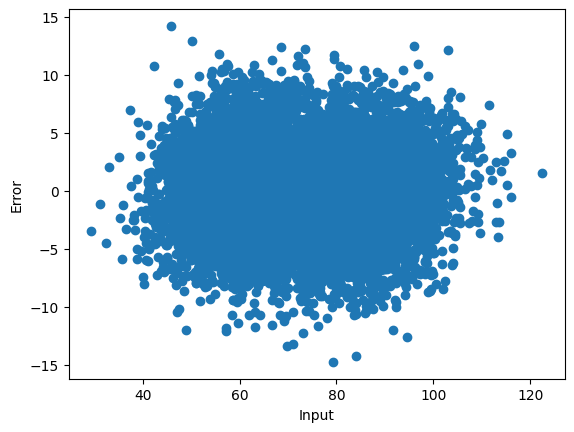

In [43]:
plt.scatter(x=wt_ht_data_copy['Weight_kg'],y=Error)
plt.xlabel('Input')
plt.ylabel('Error')
plt.show()
#From mean if the 

### Assumption 6 : Zero residual mean test

#### It is a plot between actual output (y) and predicted output (y_predicted).

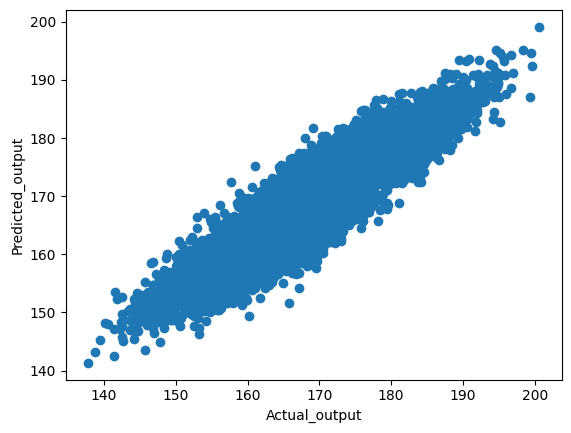

In [42]:
plt.scatter(x=y,y=y_prediction)
plt.xlabel('Actual_output')
plt.ylabel('Predicted_output')
plt.show()

### 9. Model Deployment

In [ ]:
linear_model

In [44]:
from pickle import dump

In [46]:
dump(linear_model,open('Height_predict.pkl','wb'))   #write in bytes

In [47]:
from pickle import load

In [48]:
load_file = load(open('Height_predict.pkl','rb'))  #reading the file

In [49]:
load_file.predict(x_input)

C:\Users\venka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[169.68106414],
       [175.88735635]])

In [ ]:
# THe END of Linear Regression